In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('/home/dennis/llp'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from lib import save_dicts_to_jsonl

In [3]:
from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate
from langchain_core.pydantic_v1 import BaseModel
from langchain_experimental.tabular_synthetic_data.openai import (
    OPENAI_TEMPLATE,
    create_openai_data_generator,
)
from langchain_experimental.tabular_synthetic_data.prompts import (
    SYNTHETIC_FEW_SHOT_PREFIX,
    SYNTHETIC_FEW_SHOT_SUFFIX,
)
from langchain_openai import ChatOpenAI

In [4]:
import dotenv
dotenv.load_dotenv()

True

In [8]:
examples = [
    {
        "example": """Patient ID: 123456, Patient Name: John Doe, Diagnosis Code: 
        J20.9, Procedure Code: 99203, Total Charge: $500, Insurance Claim Amount: $350"""
    },
    {
        "example": """Patient ID: 789012, Patient Name: Johnson Smith, Diagnosis 
        Code: M54.5, Procedure Code: 99213, Total Charge: $150, Insurance Claim Amount: $120"""
    },
    {
        "example": """Patient ID: 345678, Patient Name: Emily Stone, Diagnosis Code: 
        E11.9, Procedure Code: 99214, Total Charge: $300, Insurance Claim Amount: $250"""
    },
]

In [9]:
OPENAI_TEMPLATE = PromptTemplate(input_variables=["example"], template="{example}")

prompt_template = FewShotPromptTemplate(
    prefix=SYNTHETIC_FEW_SHOT_PREFIX,
    examples=examples,
    suffix=SYNTHETIC_FEW_SHOT_SUFFIX,
    input_variables=["subject", "extra"],
    example_prompt=OPENAI_TEMPLATE,
)

In [10]:
class MedicalBilling(BaseModel):
    patient_name: str
    diagnosis_code: str
    procedure_code: str
    total_charge: float
    insurance_claim_amount: float

In [5]:
from lib import ModelBuilder

In [18]:
synthetic_data_generator = create_openai_data_generator(
    output_schema=MedicalBilling,
    llm=ModelBuilder.createVseGptModel("openai/gpt-3.5-turbo-16k", 0.2),  # You'll need to replace with your actual Language Model instance
    prompt=prompt_template,
)

In [19]:
synthetic_results = synthetic_data_generator.generate(
    subject="medical_billing",
    extra="the name must be chosen at random. Make it something you wouldn't normally choose.",
    runs=10,
)

In [21]:
synthetic_results

[MedicalBilling(patient_id=987654, patient_name='Samantha Black', diagnosis_code='F32.9', procedure_code='99204', total_charge=400.0, insurance_claim_amount=300.0),
 MedicalBilling(patient_id=123456, patient_name='Ezekiel Thorn', diagnosis_code='G47.9', procedure_code='99203', total_charge=250.0, insurance_claim_amount=200.0),
 MedicalBilling(patient_id=456789, patient_name='Aurora Moon', diagnosis_code='I10', procedure_code='99213', total_charge=350.0, insurance_claim_amount=275.0),
 MedicalBilling(patient_id=987654, patient_name='Oliver Stone', diagnosis_code='M54.5', procedure_code='99205', total_charge=450.0, insurance_claim_amount=350.0),
 MedicalBilling(patient_id=789012, patient_name='Octavia Winter', diagnosis_code='F32.9', procedure_code='99204', total_charge=300.0, insurance_claim_amount=240.0),
 MedicalBilling(patient_id=123456, patient_name='Zephyr Storm', diagnosis_code='G47.0', procedure_code='99214', total_charge=400.0, insurance_claim_amount=320.0),
 MedicalBilling(pati

In [6]:
class TestCase(BaseModel):
    question: str
    answer: str

In [5]:
examples = [
    {"input": "Что такое аддитивное смешивание", "reference": "Смесь основных цветов, которые прибавляют в различном сочетании их долей"},
{"input": "На каком принципе основано цветное телевидение?", "reference": "Аддитивное смешивание"},
{"input": "Какие цвета называют основынми пигментными?", "reference": "Циан, Магента, Желтый"},
{"input": "Как получить черный или темно-серый цвет?", "reference": "Смегением трех пигментных основных цветов"},
{"input": "Что такое круг Освальда?", "reference": "Шаблон в котором представлены все цвета, которые можно получить смешиванием желтого, красного, голубого"},
{"input": "Что следует знать при однослойном окрашивании?", "reference": "Двухкомпонентная эмаль должна быть смешена с отвердителем и разжижителем, пежде чем будет проведено окрашивание"},]

In [7]:
examples = [
    {"example": """text: 'Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ. Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 (для обеспечения достаточного количества остаточного кислорода в отработавших газах).', input: 'Для чего нужен окислительный нейтрализатор?', reference: 'Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ.'"""},
    {"example": """text: 'Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ. Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 (для обеспечения достаточного количества остаточного кислорода в отработавших газах).' 'input': 'На каком уровне должна быть ламбдя для работы двигателя на обедненной смеси', 'reference': 'Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 (для обеспечения достаточного количества остаточного кислорода в отработавших газах).'"""},
]

In [8]:
OPENAI_TEMPLATE = PromptTemplate(input_variables=["example"], template="{example}")

prompt_template = FewShotPromptTemplate(
    prefix=SYNTHETIC_FEW_SHOT_PREFIX,
    examples=examples,
    suffix=SYNTHETIC_FEW_SHOT_SUFFIX,
    input_variables=["subject", "text", "extra"],
    example_prompt=OPENAI_TEMPLATE,
)

In [64]:
synthetic_data_generator = create_openai_data_generator(
    output_schema=TestCase,
    llm=ModelBuilder.createVseGptModel("openai/gpt-3.5-turbo-16k", 0),  # You'll need to replace with your actual Language Model instance
    prompt=prompt_template,
)

In [33]:
synthetic_results = synthetic_data_generator.generate(
    subject="test_case",
    text="""Трехкомпонентный нейтрализатор получил такое название потому, что может преобразовывать три токсичных вещества HC, CO и NOx в нетоксичные вещества 6 Service Training, VK-21, 05.2005 H2O, CO2 и N2.""",
    extra="leave only reasonable facts, then generate 'question' (as if it is a question) based on 'text' with 'answer' - information what was used to gernerate a question. Make it in Russian",
    runs=1,
)

NameError: name 'synthetic_data_generator' is not defined

In [68]:
synthetic_results

[TestCase(input='Для чего используется окислительный нейтрализатор?', reference='Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ.'),
 TestCase(input='Для чего используется окислительный нейтрализатор?', reference='Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ.'),
 TestCase(input='Для чего используется окислительный нейтрализатор?', reference='Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ.')]

In [9]:
from typing import List

from langchain.chains import create_extraction_chain_pydantic
from langchain.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import OpenAI
from pydantic import BaseModel, Field

In [10]:
template = """Сформулируйте вопрос на основе текста, так, чтобы он выглядел как вопрос, и укажите идеальный ответ. Ваш ответ должен содержать конкретный отрывок текста, использованный для генерации вопроса. Формат выхода: \n{format_instructions} \n{text}\n"""

In [7]:
llm = ModelBuilder.createVseGptModel("openai/gpt-3.5-turbo-16k", 0)

prompt = PromptTemplate(
    template="""generate 'question' (as if it is a question) based on 'text' with 'answer' - answer = information what was used to gernerate a question. Make it in Russian. \n{format_instructions} \n{text}\n""",
    input_variables=["text"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)


In [35]:

_input = prompt.format_prompt(text="Трехкомпонентный нейтрализатор получил такое название потому, что может преобразовывать три токсичных вещества HC, CO и NOx в нетоксичные вещества H2O, CO2 и N2.")
output = llm.invoke(_input)

parsed = parser.parse(output.content)
parsed

TestCase(question='Почему трехкомпонентный нейтрализатор получил такое название?', answer='информация о том, что трехкомпонентный нейтрализатор может преобразовывать три токсичных вещества HC, CO и NOx в нетоксичные вещества H2O, CO2 и N2')

In [8]:
import pathlib
from lib import load_dicts_from_jsonl

FOLDER_JSONL = '/home/dennis/llp/data/jsonl_01_05 (3rd copy)'
def read_locals(dir_path: str):
    p = pathlib.Path(dir_path) #!
    files = [str(fp.absolute()) for fp in p.rglob("*.jsonl")]
    data = [ ]
    for fp in files:
        data.extend(load_dicts_from_jsonl(fp))
    return data

In [9]:
data = read_locals(FOLDER_JSONL)

In [11]:
tests = []

In [10]:
import random

In [21]:
def gen_test(doc):
    llm = ModelBuilder.createVseGptModel("openai/gpt-3.5-turbo-16k", 0)
    parser = PydanticOutputParser(pydantic_object=TestCase)

    prompt = PromptTemplate(
        template="""Сформулируйте вопрос на основе текста, так, чтобы он выглядел как вопрос, и укажите идеальный ответ. Ваш ответ должен содержать информацию, использованную для генерации вопроса. На данном этапе описание формата вопроса ещё не составлено, его можно получить, вызвав функцию parser.get_format_instructions().\n{text}\n""",
        input_variables=["text"],
        partial_variables={"format_instructions": parser.get_format_instructions()},
    )

    cases = []
    sents = doc['data']['pages']['text'].split(".")
    fps = int(len(sents) * 0.01)
    for i in range(fps):
        ind = random.randint(0, fps)
        text = sents[ind]
        if len(text.strip()) > 30:
            
            _input = prompt.format_prompt(text=text.strip())

            try:
                output = llm.invoke(_input)
                parsed = parser.parse(output.content)
                cases.append(parsed)
            except :
                continue
    return cases

In [35]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"question": {"title": "Question", "type": "string"}, "answer": {"title": "Answer", "type": "string"}}, "required": ["question", "answer"]}\n```'

In [23]:
from multiprocessing import Pool
from tqdm import tqdm
pool = Pool(10)

In [14]:
tests = []

In [24]:
with Pool(12) as pool:
    for result in tqdm(pool.imap(gen_test, data[50:], chunksize=10)):
        tests.extend(result)

1914it [30:34,  1.04it/s]


In [34]:
tests[256]

TestCase(question='Какой диаметр посадочного отверстия втулки верхней головки шатуна?', answer='Информация о диаметре посадочного отверстия втулки верхней головки шатуна была использована для создания этого вопроса.')

In [88]:
parser.parse(output.content)

TestCase(input='Какие токсичные вещества может преобразовывать трехкомпонентный нейтрализатор?', reference='6 Service Training, VK-21, 05.2005')

In [ ]:
extractor = create_extraction_chain_pydantic(pydantic_schema=Actor, llm=model)
extracted = extractor.run(dataset[1]["text"])
extracted

In [37]:
examples = [
    {"input": "Что такое аддитивное смешивание", "reference": "Смесь основных цветов, которые прибавляют в различном сочетании их долей"},
    {"input": "На каком принципе основано цветное телевидение?", "reference": "Аддитивное смешивание"},
    {"input": "Какие цвета называют основынми пигментными?", "reference": "Циан, Магента, Желтый"},
    {"input": "Как получить черный или темно-серый цвет?", "reference": "Смегением трех пигментных основных цветов"},
    {"input": "Что такое круг Освальда?", "reference": "Шаблон в котором представлены все цвета, которые можно получить смешиванием желтого, красного, голубого"},
    {"input": "Что следует знать при однослойном окрашивании?", "reference": "Двухкомпонентная эмаль должна быть смешена с отвердителем и разжижителем, пежде чем будет проведено окрашивание"},
]

In [49]:
examples = [
    {"text": "Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ. Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 (для обеспечения достаточного количества остаточного кислорода в отработавших газах).", "input": 'Для чего нужен окислительный нейтрализатор?', "reference": 'Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ.'},
    {"text": 'Выпускная труба имеет однопоточную конструкцию с системой охлаждения и рециркуляции ОГ, датчиком температуры ОГ, лямбда-зондом перед катализатором, окислительным катализатором и сажевым фильтром (DPF). При такой конструкции выпускной системы для обеспечения правильного функционирования сажевого фильтра необходимо применение топливных присадок.', "input": 'Из чего состоит выпускная труба?', 'reference': 'Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 (для обеспечения достаточного количества остаточного кислорода в отработавших газах).'},
]

In [124]:
examples = [
    {"text": "Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ. Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 (для обеспечения достаточного количества остаточного кислорода в отработавших газах).", "input": 'Для чего нужен окислительный нейтрализатор?', "reference": 'Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ.'},
    {"text": 'Выпускная труба имеет однопоточную конструкцию с системой охлаждения и рециркуляции ОГ, датчиком температуры ОГ, лямбда-зондом перед катализатором, окислительным катализатором и сажевым фильтром (DPF). При такой конструкции выпускной системы для обеспечения правильного функционирования сажевого фильтра необходимо применение топливных присадок.', "input": 'Из чего состоит выпускная труба?', 'reference': 'Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 (для обеспечения достаточного количества остаточного кислорода в отработавших газах).'},
]
example_prompt = PromptTemplate(
    input_variables=["text", "input", "reference"], template="Text: {text}\nQuestion: {input}\n{reference}"
)

In [132]:
print(example_prompt.format(**examples[1]))

Text: Выпускная труба имеет однопоточную конструкцию с системой охлаждения и рециркуляции ОГ, датчиком температуры ОГ, лямбда-зондом перед катализатором, окислительным катализатором и сажевым фильтром (DPF). При такой конструкции выпускной системы для обеспечения правильного функционирования сажевого фильтра необходимо применение топливных присадок.
Question: Из чего состоит выпускная труба?
Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 (для обеспечения достаточного количества остаточного кислорода в отработавших газах).


In [11]:
examples = [
    {
        "text": """Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ. 
        Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 
        (для обеспечения достаточного количества остаточного кислорода в отработавших газах).""", 
        "input": 'Для чего нужен окислительный нейтрализатор?', 
        "reference": 'Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ.'
    },
    {
        "text": """Выпускная труба имеет однопоточную конструкцию с системой охлаждения и рециркуляции ОГ, датчиком температуры ОГ,
            лямбда-зондом перед катализатором, окислительным катализатором и сажевым фильтром (DPF).
            При такой конструкции выпускной системы для обеспечения правильного функционирования сажевого фильтра необходимо 
            применение топливных присадок.""", 
        "input": 'Из чего состоит выпускная труба?', 
        'reference': """Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 
        (для обеспечения достаточного количества остаточного кислорода в отработавших газах)."""
    },
]
parser = PydanticOutputParser(pydantic_object=TestCase)
example_prompt = PromptTemplate(
    input_variables=["text", "input", "reference"], template="Text: {text}\nQuestion: {input}\n{reference}"
)
fs_prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="{format_instructions}\nText: {text}",
    input_variables=["text"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

In [19]:
print(fs_prompt.format(text="Who was the father of Mary Ball Washington"))

Text: Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ. 
        Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 
        (для обеспечения достаточного количества остаточного кислорода в отработавших газах).
Question: Для чего нужен окислительный нейтрализатор?
Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ.

Text: Выпускная труба имеет однопоточную конструкцию с системой охлаждения и рециркуляции ОГ, датчиком температуры ОГ,
            лямбда-зондом перед катализатором, окислительным катализатором и сажевым фильтром (DPF).
            При такой конструкции выпускной системы для обеспечения правильного функционирования сажевого фильтра необходимо 
            применение топливных присадок.
Question: Из чего состоит выпускная труба?
Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 
        (для обеспечения достаточного количества о

In [20]:
llm = ModelBuilder.createVseGptModel("openchat/openchat-7b", 0)

In [21]:
text="""Трехкомпонентный нейтрализатор получил такое название потому, что может преобразовывать три токсичных вещества HC, CO и NOx в нетоксичные вещества 6 Service Training, VK-21, 05.2005 H2O, CO2 и N2.""",
llm.invoke(input=fs_prompt.format(text=text))

AIMessage(content='{"question": "Как называется нейтрализатор, который может преобразовывать три токсичных вещества HC, CO и NOx в нетоксичные вещества?", "answer": "Трехкомпонентный нейтрализатор"}', response_metadata={'token_usage': {'completion_tokens': 76, 'prompt_tokens': 705, 'total_tokens': 781}, 'model_name': 'openchat/openchat-7b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-d24163c0-d6d8-450d-aef8-2acceca196f5-0')

In [24]:
import random
def gen_test_fs2(doc):
    llm = ModelBuilder.createVseGptModel("openchat/openchat-7b", 0)
    parser = PydanticOutputParser(pydantic_object=TestCase)
    example_prompt = PromptTemplate(
        input_variables=["text", "input", "reference"], template="Text: {text}\nQuestion: {input}\n{reference}"
    )
    fs_prompt = FewShotPromptTemplate(
        examples=examples,
        example_prompt=example_prompt,
        suffix="{format_instructions}\nText: {text}",
        input_variables=["text"],
        partial_variables={"format_instructions": parser.get_format_instructions()},
    )

    cases = []
    sents = doc['data']['pages']['text'].split(".")
    fps = int(len(sents) * 0.01)
    for i in range(fps):
        ind = random.randint(0, fps)
        text = sents[ind]
        if len(text.strip()) > 30:
            
            _input = fs_prompt.format_prompt(text=text.strip())

            try:
                output = llm.invoke(_input)
                parsed = parser.parse(output.content)
                cases.append(parsed)
            except :
                continue
    return cases

In [38]:
rand_docss = [data[random.randint(0, len(data) - 1)] for _ in range(1000)]

In [40]:
from multiprocessing import Pool
from tqdm import tqdm
pool = Pool(10)

In [41]:
test_cases = []
with Pool(processes=12) as p:
    max_ = 1000
    with tqdm(total=max_) as pbar:
        for result in p.imap_unordered(gen_test_fs2, rand_docss):
            test_cases.extend(result)
            pbar.update()

100%|██████████| 1000/1000 [15:01<00:00,  1.11it/s] 


In [55]:
test_cases[275]

TestCase(question='Когда новый двигатель 2,0 л TDICR уже отвечает требованиям нормы Евро 5?', answer='Новый двигатель 2,0 л TDICR уже сегодня отвечает строгим требованиям нормы Евро 5, которая должна вступить в силу только в 2010 году.')

In [17]:
synthetic_data_generator = create_openai_data_generator(
    output_schema=TestCase,
    llm=ModelBuilder.createVseGptModel("openchat/openchat-7b", 0),  # You'll need to replace with your actual Language Model instance
    prompt=fs_prompt,
)

In [18]:
synthetic_results = synthetic_data_generator.generate(
    subject="test_case",
    text="""Трехкомпонентный нейтрализатор получил такое название потому, что может преобразовывать три токсичных вещества HC, CO и NOx в нетоксичные вещества 6 Service Training, VK-21, 05.2005 H2O, CO2 и N2.""",
    # extra="leave only reasonable facts, then generate 'question' (as if it is a question) based on 'text' with 'answer' - information what was used to gernerate a question. Make it in Russian",
    extra="""Сформулируйте вопрос на основе текста и укажите идеальный ответ. Ваш ответ должен содержать информацию, использованную для генерации вопроса.""",
    runs=1,
)

OutputParserException: Could not parse function call: 'function_call'

In [102]:
synthetic_results

[TestCase(question='Из чего состоит выпускная труба?', answer='Выпускная труба имеет однопоточную конструкцию с системой охлаждения и рециркуляции ОГ, датчиком температуры ОГ, лямбда-зондом перед катализатором, окислительным катализатором и сажевым фильтром (DPF). При такой конструкции выпускной системы для обеспечения правильного функционирования сажевого фильтра необходимо применение топливных присадок.')]

In [116]:
def gen_test_fs(doc):
    # examples = [
    #     {
    #         "text": """Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ. 
    #         Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 
    #         (для обеспечения достаточного количества остаточного кислорода в отработавших газах).""", 
    #         "input": 'Для чего нужен окислительный нейтрализатор?', 
    #         "reference": 'Окислительным нейтрализатор служит для преобразования HC и CO в водяной пар и углекислый газ.'
    #     },
    #     {
    #         "text": """Выпускная труба имеет однопоточную конструкцию с системой охлаждения и рециркуляции ОГ, датчиком температуры ОГ,
    #          лямбда-зондом перед катализатором, окислительным катализатором и сажевым фильтром (DPF).
    #           При такой конструкции выпускной системы для обеспечения правильного функционирования сажевого фильтра необходимо 
    #           применение топливных присадок.""", 
    #         "input": 'Из чего состоит выпускная труба?', 
    #         'reference': """Для этого необходима работа двигателя на обедненной смеси со значением лямбда > 1 
    #         (для обеспечения достаточного количества остаточного кислорода в отработавших газах)."""
    #     },
    # ]
    # example_prompt = PromptTemplate(
    #     input_variables=["text", "input", "reference"], template="Text: {text}\nQuestion: {input}\n{reference}"
    # )
    # fs_prompt = FewShotPromptTemplate(
    #     examples=examples,
    #     example_prompt=example_prompt,
    #     suffix="{format_instructions}\nText: {text}",
    #     input_variables=["text"],
    #     partial_variables={"format_instructions": parser.get_format_instructions()},
    # )
    # synthetic_data_generator = create_openai_data_generator(
    #     output_schema=TestCase,
    #     llm=ModelBuilder.createVseGptModel("openchat/openchat-7b", 0),  # You'll need to replace with your actual Language Model instance
    #     prompt=fs_prompt,
    # )

    cases = []
    sents = doc['data']['pages']['text'].split(".")
    fps = int(len(sents) * 0.01)
    for i in range(fps):
        ind = random.randint(0, fps)
        text = sents[ind]
        if len(text.strip()) > 30:
            try:
                synthetic_results = synthetic_data_generator.generate(
                    subject="test_case",
                    text = text.replace("\n", ""),
                    runs=1,
                )
                cases.extend(synthetic_results)
            except Exception as e:
                print("fuck: ", e)
                print("fs prompt ", fs_prompt)
                continue
    return cases

In [118]:
tests_fs = []
for result in data[:2]:
    tests_fs.extend(gen_test_fs(result))

fuck:  'input'
fs prompt  input_variables=['text'] partial_variables={'format_instructions': 'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"question": {"title": "Question", "type": "string"}, "answer": {"title": "Answer", "type": "string"}}, "required": ["question", "answer"]}\n```'} examples=[{'text': 'Выпускная труба имеет однопоточную конструкцию с системой охлаждения и рециркуляции ОГ, датчиком температуры ОГ, лямбда-зондом перед катализатором, окислительным катализатором и сажевым фильтром (DPF). При такой конструкции выпускной системы для обеспечения правильн

In [119]:
tests_fs

[]

# save data

In [56]:
maped_tests = list(map(lambda tcase : tcase.__dict__, test_cases))

In [57]:
save_dicts_to_jsonl(maped_tests, "/home/dennis/llp/eval/evals/registry/data/testrag/tests_gen_2.jsonl")

In [63]:
import matplotlib.pyplot as plt

def count_lengths(data):
    question_lengths = [len(item['question']) for item in data if len(item['question']) >= 10]
    answer_lengths = [len(item['answer']) for item in data if len(item['answer']) >= 10]
    return question_lengths, answer_lengths


def plot_histogram(question_lengths, answer_lengths):
    plt.hist(question_lengths, bins=20, alpha=0.5, label='Question Length')
    plt.hist(answer_lengths, bins=20, alpha=0.5, label='Answer Length')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.title('Question and Answer Length Histogram')
    plt.legend()
    plt.show()

question_lengths, answer_lengths = count_lengths(maped_tests)
plot_histogram(question_lengths, answer_lengths)


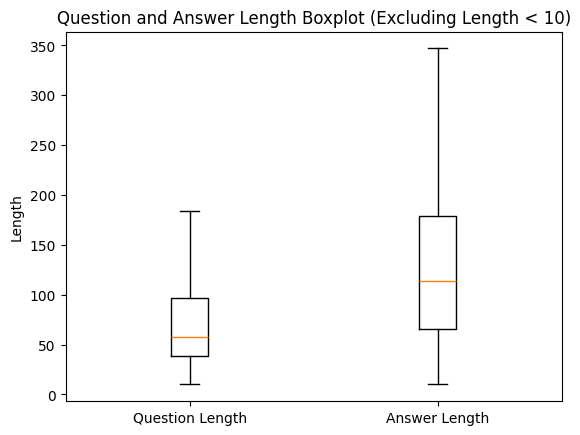

In [64]:
def plot_boxplot(question_lengths, answer_lengths):
    plt.boxplot([question_lengths, answer_lengths], labels=['Question Length', 'Answer Length'], showfliers=False)
    plt.ylabel('Length')
    plt.title('Question and Answer Length Boxplot (Excluding Length < 10)')
    plt.show()

plot_boxplot(question_lengths, answer_lengths)